# Capstone Project - Januka Dharmapriya (266)

---



In [1]:
import numpy as np 
import pandas as pd 
import os

from sklearn import preprocessing
from scipy.stats import pearsonr

# machine learning  - supervised
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score


# Loading the Training and Testing datasets

- Read two seperate work sheets in the same Excel file using pandas.

In [2]:
train_df = pd.read_csv('https://raw.githubusercontent.com/JanukaD/Capstone-Project/main/datasets/1/train.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/JanukaD/Capstone-Project/main/datasets/1/test.csv')

## - Describing the Training dataset

- First five rows of the training dataset.

In [3]:
train_df.head()

,ID,Age,Gender,TB,DB,ALK,SGPT,SGOT,TP,ALB,AG_Ratio,Class
0,1,65,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,Yes
1,2,62,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,Yes
2,3,62,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,Yes
3,4,58,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,Yes
4,5,72,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,Yes


- Check the columns that contains null values in the training dataset.

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        583 non-null    int64  
 1   Age       583 non-null    int64  
 2   Gender    583 non-null    object 
 3   TB        581 non-null    float64
 4   DB        579 non-null    float64
 5   ALK       581 non-null    float64
 6   SGPT      582 non-null    float64
 7   SGOT      582 non-null    float64
 8   TP        581 non-null    float64
 9   ALB       581 non-null    float64
 10  AG_Ratio  582 non-null    float64
 11  Class     583 non-null    object 
dtypes: float64(8), int64(2), object(2)
memory usage: 54.8+ KB


- Count of the null values in each column in the training dataset.

In [5]:
train_df.isnull().sum()

ID          0
Age         0
Gender      0
TB          2
DB          4
ALK         2
SGPT        1
SGOT        1
TP          2
ALB         2
AG_Ratio    1
Class       0
dtype: int64

- Describing the Training dataset

In [6]:
train_df.describe()

,ID,Age,TB,DB,ALK,SGPT,SGOT,TP,ALB,AG_Ratio
count,583.000000,583.000000,581.000000,579.000000,581.000000,582.000000,582.000000,581.000000,581.000000,582.000000
mean,292.000000,44.746141,3.307573,1.486701,291.063683,80.780069,110.073883,6.486231,3.138382,0.946306
std,168.441879,16.189833,6.218411,2.817115,243.206230,182.770380,289.140205,1.085508,0.794631,0.318994
min,1.000000,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,146.500000,33.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000
50%,292.000000,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.925000
75%,437.500000,58.000000,2.600000,1.300000,298.000000,60.750000,87.000000,7.200000,3.800000,1.100000
max,583.000000,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


## - Describing the Testing dataset

- First five rows of the testing dataset.

In [7]:
test_df.head()

,ID,Age,Gender,TB,DB,ALK,SGPT,SGOT,TP,ALB,AG_Ratio,Class
0,1,65,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,Yes
1,2,62,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,Yes
2,3,62,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,Yes
3,4,58,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,Yes
4,5,72,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,Yes


- Check the columns that contains null values in the testing dataset.

In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        311 non-null    int64  
 1   Age       311 non-null    int64  
 2   Gender    311 non-null    object 
 3   TB        307 non-null    float64
 4   DB        308 non-null    float64
 5   ALK       309 non-null    float64
 6   SGPT      308 non-null    float64
 7   SGOT      309 non-null    float64
 8   TP        310 non-null    float64
 9   ALB       310 non-null    float64
 10  AG_Ratio  309 non-null    float64
 11  Class     311 non-null    object 
dtypes: float64(8), int64(2), object(2)
memory usage: 29.3+ KB


- Count of the null values in each column in the testing dataset.

In [9]:
test_df.isnull().sum()

ID          0
Age         0
Gender      0
TB          4
DB          3
ALK         2
SGPT        3
SGOT        2
TP          1
ALB         1
AG_Ratio    2
Class       0
dtype: int64

- Describing the Testing dataset

In [10]:
test_df.describe()

,ID,Age,TB,DB,ALK,SGPT,SGOT,TP,ALB,AG_Ratio
count,311.000000,311.000000,307.000000,308.000000,309.000000,308.000000,309.000000,310.000000,310.000000,309.000000
mean,156.000000,45.372990,3.836482,1.726299,277.812298,77.844156,103.734628,6.634516,3.199032,0.937735
std,89.922189,16.474294,7.554519,3.269869,194.084457,171.754394,227.543019,1.094412,0.811546,0.323404
min,1.000000,4.000000,0.500000,0.100000,63.000000,10.000000,11.000000,2.700000,0.900000,0.300000
25%,78.500000,33.000000,0.800000,0.200000,180.000000,22.000000,25.000000,5.925000,2.700000,0.700000
50%,156.000000,46.000000,1.000000,0.300000,210.000000,33.000000,40.000000,6.800000,3.200000,0.960000
75%,233.500000,59.000000,2.700000,1.300000,298.000000,60.000000,79.000000,7.300000,3.900000,1.100000
max,311.000000,90.000000,75.000000,19.700000,1630.000000,2000.000000,2946.000000,9.600000,5.500000,2.800000


# Visualization of the datasets

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

- Class distribution of the Training dataset

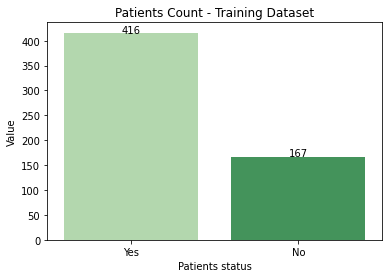

In [12]:
graph = sns.countplot(data = train_df, x = "Class", label = "Count", palette="Greens")
plt.title('Patients Count - Training Dataset')
plt.xlabel('Patients status')
plt.ylabel('Value')

i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        train_df['Class'].value_counts()[i],ha="center")
    i += 1

- Class distribution of the Test dataset

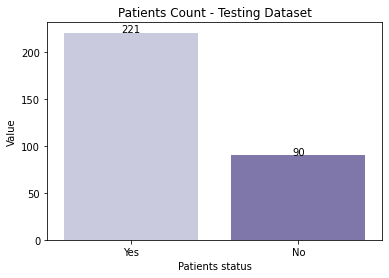

In [13]:
graph = sns.countplot(data = test_df, x = "Class", label = "Count", palette="Purples")
plt.title('Patients Count - Testing Dataset')
plt.xlabel('Patients status')
plt.ylabel('Value')

i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        test_df['Class'].value_counts()[i],ha="center")
    i += 1

# Data pre-processing

- Convert categorical variables (Gender & Class) to the dummy variables - Training dataset

In [14]:
train_df_dummy = pd.get_dummies(train_df, columns=["Gender","Class"], drop_first=True)
print(train_df_dummy.head(6))

   ID  Age    TB   DB    ALK  SGPT   SGOT   TP  ALB  AG_Ratio  Gender_Male  \
0   1   65   0.7  0.1  187.0  16.0   18.0  6.8  3.3      0.90            0   
1   2   62  10.9  5.5  699.0  64.0  100.0  7.5  3.2      0.74            1   
2   3   62   7.3  4.1  490.0  60.0   68.0  7.0  3.3      0.89            1   
3   4   58   1.0  0.4  182.0  14.0   20.0  6.8  3.4      1.00            1   
4   5   72   3.9  2.0  195.0  27.0   59.0  7.3  2.4      0.40            1   
5   6   46   1.8  0.7  208.0  19.0   14.0  7.6  4.4      1.30            1   

   Class_Yes  
0          1  
1          1  
2          1  
3          1  
4          1  
5          1  


- Convert categorical variables (Gender & class) to the dummy variables - Testing dataset

In [15]:
test_df_dummy = pd.get_dummies(test_df, columns=["Gender","Class"], drop_first=True)
print(test_df_dummy.head(6))

   ID  Age    TB   DB    ALK  SGPT   SGOT   TP  ALB  AG_Ratio  Gender_Male  \
0   1   65   0.7  0.1  187.0  16.0   18.0  6.8  3.3      0.90            0   
1   2   62  10.9  5.5  699.0  64.0  100.0  7.5  3.2      0.74            1   
2   3   62   7.3  4.1  490.0  60.0   68.0  7.0  3.3      0.89            1   
3   4   58   1.0  0.4  182.0  14.0   20.0  6.8  3.4      1.00            1   
4   5   72   3.9  2.0  195.0  27.0   59.0  7.3  2.4      0.40            1   
5   6   30   0.9  0.3  202.0  15.0   11.0  6.7  3.1      1.10            0   

   Class_Yes  
0          1  
1          1  
2          1  
3          1  
4          1  
5          1  


- Fill missing values in column with mean - Training dataset

In [16]:
from sklearn.impute import SimpleImputer

imp=SimpleImputer(missing_values=np.NaN, strategy = 'mean')

train_df_imputed = pd.DataFrame(imp.fit_transform(train_df_dummy))
train_df_imputed.columns=train_df_dummy.columns
train_df_imputed.index=train_df_dummy.index

In [17]:
train_df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           583 non-null    float64
 1   Age          583 non-null    float64
 2   TB           583 non-null    float64
 3   DB           583 non-null    float64
 4   ALK          583 non-null    float64
 5   SGPT         583 non-null    float64
 6   SGOT         583 non-null    float64
 7   TP           583 non-null    float64
 8   ALB          583 non-null    float64
 9   AG_Ratio     583 non-null    float64
 10  Gender_Male  583 non-null    float64
 11  Class_Yes    583 non-null    float64
dtypes: float64(12)
memory usage: 54.8 KB


In [18]:
train_df_imputed.isnull().sum()

ID             0
Age            0
TB             0
DB             0
ALK            0
SGPT           0
SGOT           0
TP             0
ALB            0
AG_Ratio       0
Gender_Male    0
Class_Yes      0
dtype: int64

- Fill missing values in column with mean - Testing dataset

In [19]:
test_df_imputed = pd.DataFrame(imp.fit_transform(test_df_dummy))
test_df_imputed.columns=test_df_dummy.columns
test_df_imputed.index=test_df_dummy.index

In [20]:
test_df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           311 non-null    float64
 1   Age          311 non-null    float64
 2   TB           311 non-null    float64
 3   DB           311 non-null    float64
 4   ALK          311 non-null    float64
 5   SGPT         311 non-null    float64
 6   SGOT         311 non-null    float64
 7   TP           311 non-null    float64
 8   ALB          311 non-null    float64
 9   AG_Ratio     311 non-null    float64
 10  Gender_Male  311 non-null    float64
 11  Class_Yes    311 non-null    float64
dtypes: float64(12)
memory usage: 29.3 KB


In [21]:
test_df_imputed.isnull().sum()

ID             0
Age            0
TB             0
DB             0
ALK            0
SGPT           0
SGOT           0
TP             0
ALB            0
AG_Ratio       0
Gender_Male    0
Class_Yes      0
dtype: int64

# Feature Selection for training process

- Correlations in the training dataset

In [22]:
train_df_imputed.corr()

,ID,Age,TB,DB,ALK,SGPT,SGOT,TP,ALB,AG_Ratio,Gender_Male,Class_Yes
ID,1.000000,-0.052385,0.102097,0.137979,-0.079053,-0.124809,-0.094242,0.189367,0.062698,-0.024613,-0.029633,-0.019004
Age,-0.052385,1.000000,0.013671,0.007469,0.081128,-0.087106,-0.020252,-0.188979,-0.263220,-0.215796,0.056560,0.137351
TB,0.102097,0.013671,1.000000,0.873826,0.205340,0.213492,0.237244,-0.009687,-0.221134,-0.203780,0.088439,0.219634
DB,0.137979,0.007469,0.873826,1.000000,0.232494,0.233465,0.257226,-0.001903,-0.228159,-0.198986,0.099636,0.246275
ALK,-0.079053,0.081128,0.205340,0.232494,1.000000,0.125071,0.166413,-0.030051,-0.163532,-0.232344,-0.028170,0.183515
SGPT,-0.124809,-0.087106,0.213492,0.233465,0.125071,1.000000,0.791756,-0.043292,-0.028336,-0.001605,0.082542,0.163653
SGOT,-0.094242,-0.020252,0.237244,0.257226,0.166413,0.791756,1.000000,-0.026929,-0.084926,-0.069384,0.079348,0.151056
TP,0.189367,-0.188979,-0.009687,-0.001903,-0.030051,-0.043292,-0.026929,1.000000,0.780753,0.232740,-0.088733,-0.033288
ALB,0.062698,-0.263220,-0.221134,-0.228159,-0.163532,-0.028336,-0.084926,0.780753,1.000000,0.682795,-0.096550,-0.164621
AG_Ratio,-0.024613,-0.215796,-0.203780,-0.198986,-0.232344,-0.001605,-0.069384,0.232740,0.682795,1.000000,-0.004826,-0.162590


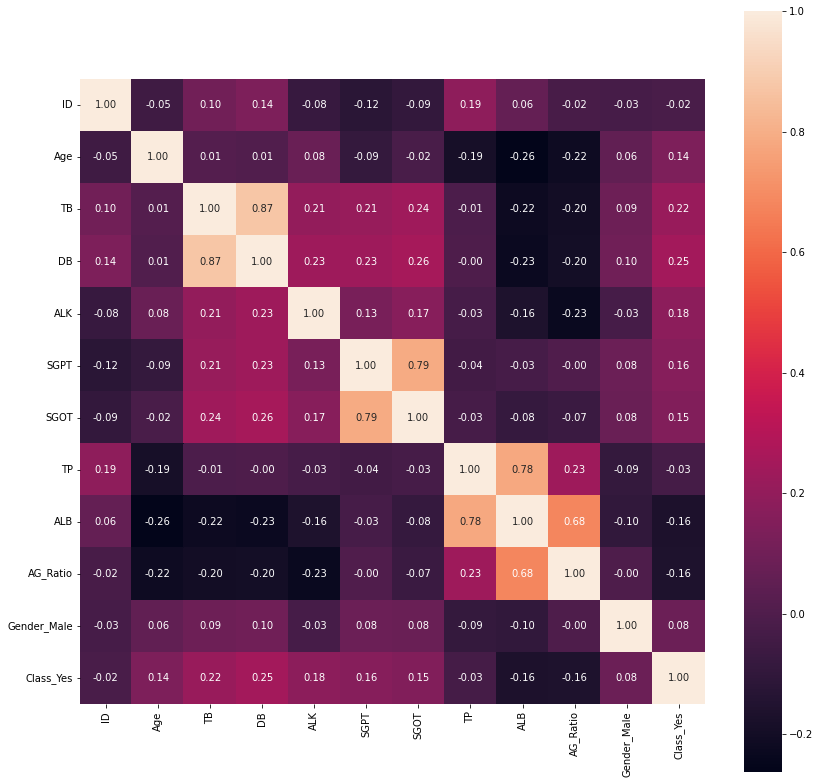

In [23]:
correlations = train_df_imputed.corr()
plt.figure(figsize=(14,14))
g = sns.heatmap(correlations,cbar = True, square = True, annot=True, fmt= '.2f', annot_kws={'size': 10})

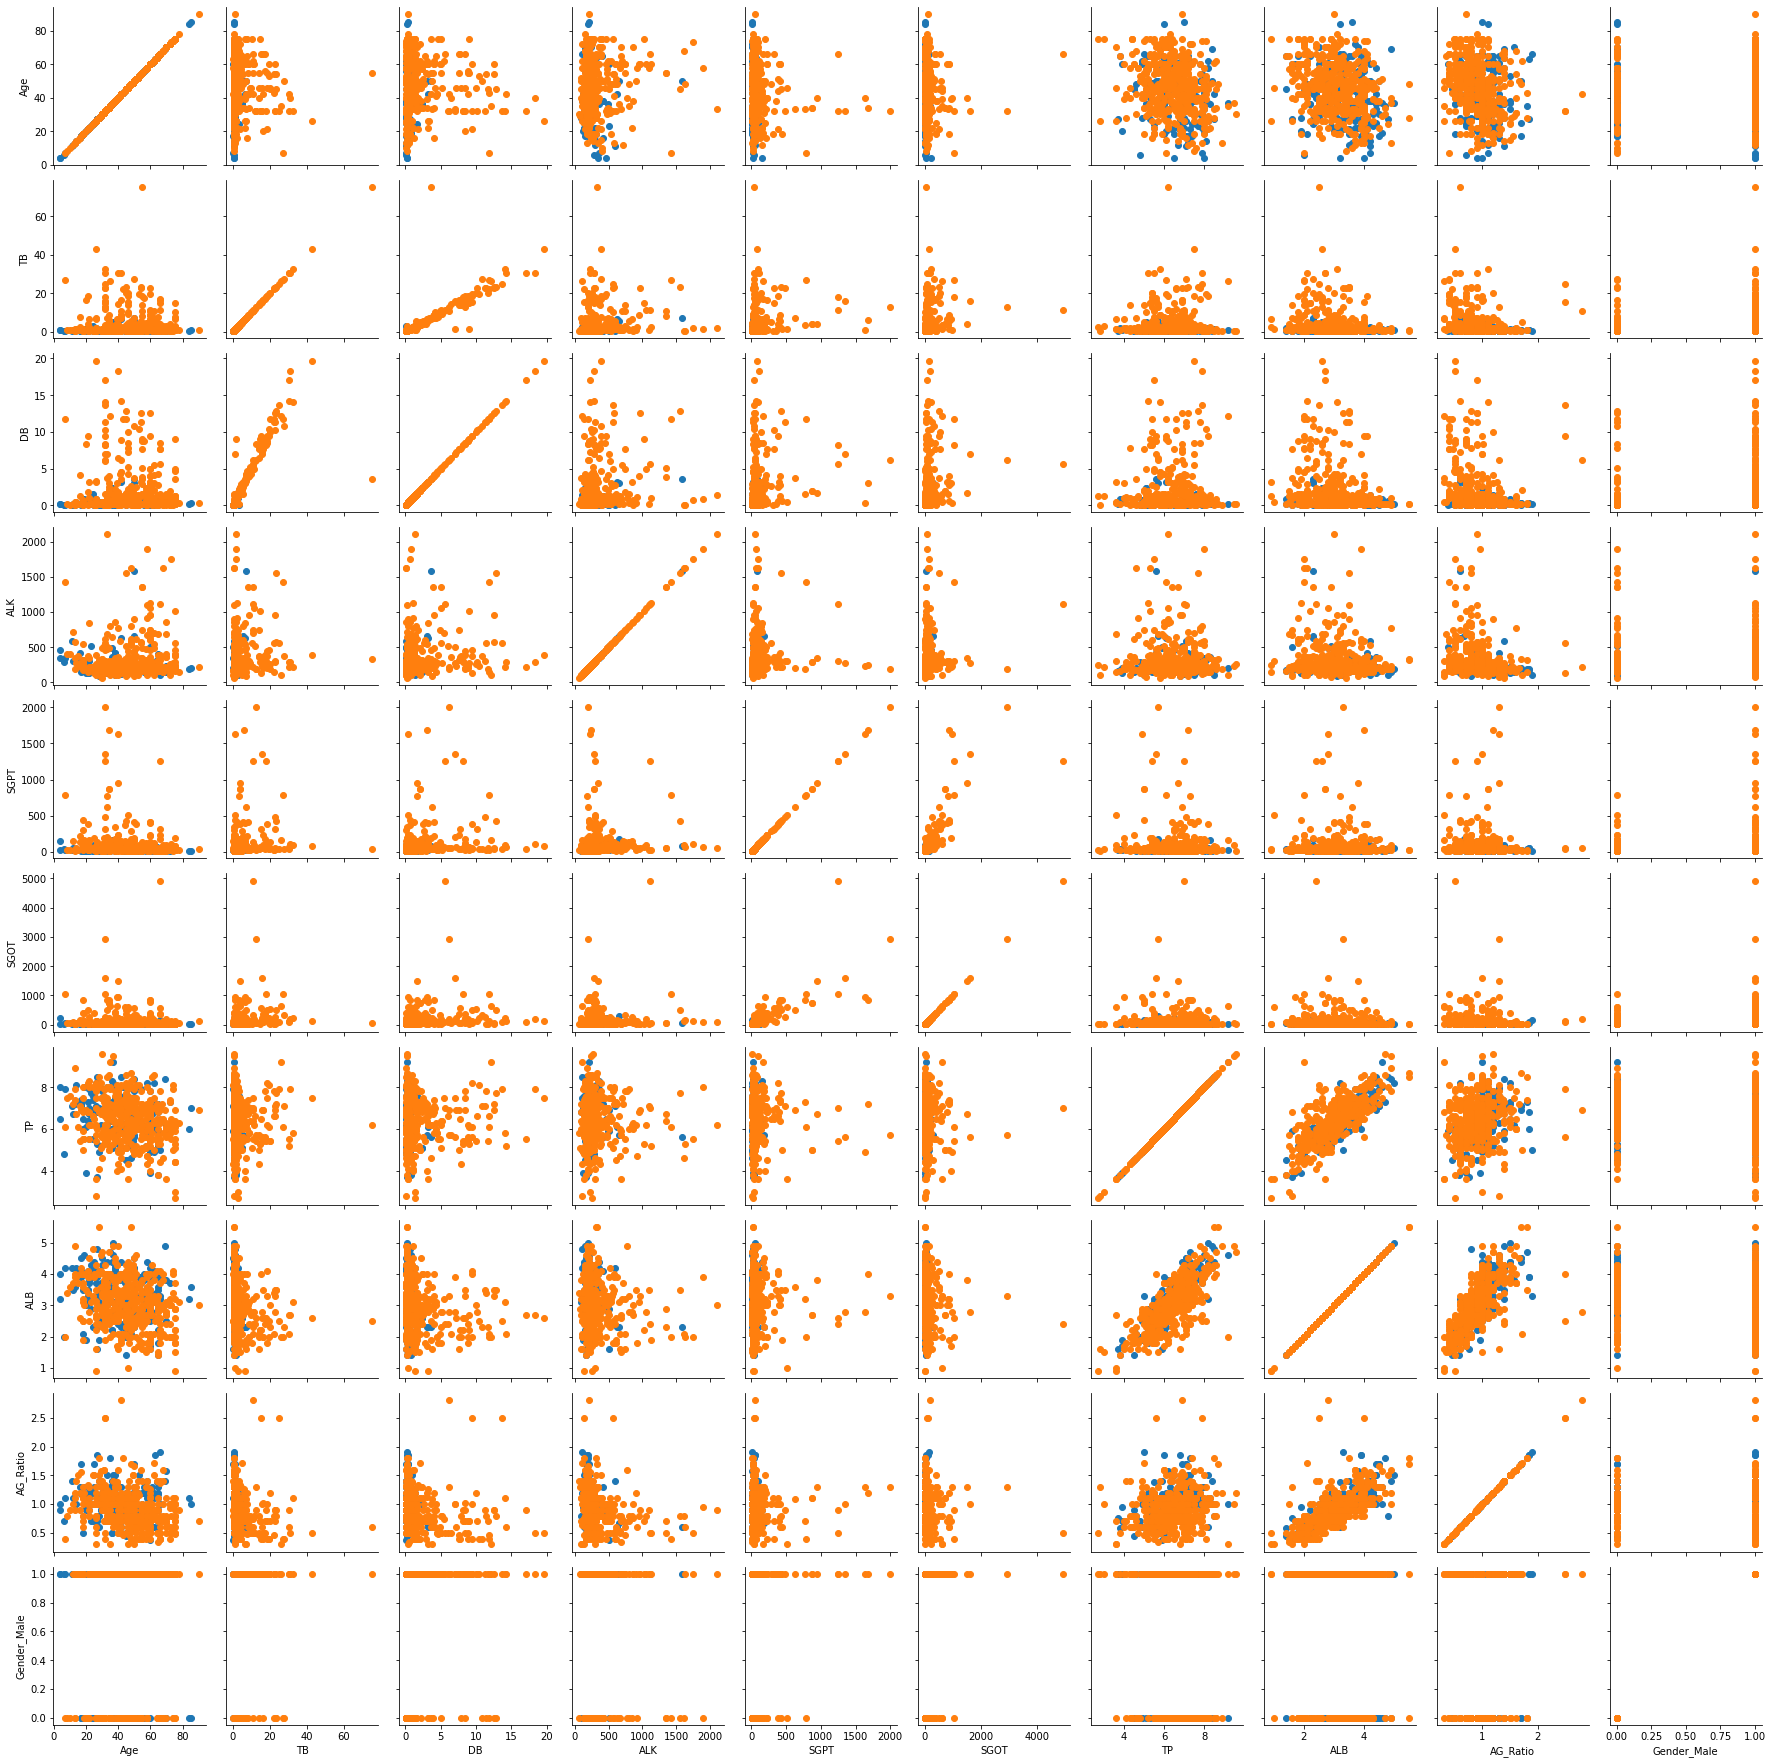

In [24]:
g = sns.PairGrid(train_df_imputed, hue = "Class_Yes", vars=['Age','TB','DB','ALK', 'SGPT', 'SGOT', 'TP', 'ALB',
                                                                'AG_Ratio', 'Gender_Male'])
g.map(plt.scatter)
plt.show()

- Getting "ANOVA F" measures

In [25]:
from sklearn.feature_selection import SelectKBest,f_classif

fvalue_selector = SelectKBest(score_func=f_classif, k="all")

X = train_df_imputed[train_df_imputed.columns.drop("Class_Yes")]
y = (train_df_imputed["Class_Yes"])

fvalue_selector.fit(X, y)
names = X.columns.values[fvalue_selector.get_support()]
scores = fvalue_selector.scores_[fvalue_selector.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns= ['Feature_name','F_Score'])
ns_df_sorted = ns_df.sort_values(['F_Score','Feature_name'], ascending = [False, True])
print(ns_df_sorted)



   Feature_name    F_Score
3            DB  37.513824
2            TB  29.447427
4           ALK  20.248643
8           ALB  16.183672
5          SGPT  15.988828
9      AG_Ratio  15.776049
6          SGOT  13.566804
1           Age  11.171429
10  Gender_Male   3.973363
7            TP   0.644499
0            ID   0.209905


# Building the Model

In [26]:
import tensorflow as tf

train_df_labels = np.array(train_df_imputed.pop("Class_Yes"))
test_df_labels = np.array(test_df_imputed.pop("Class_Yes"))

- Training the selected features (except the Gender)

In [27]:
selected_feature_columns = ['Age', 'Gender_Male','TB','DB','ALK', 'SGPT', 'SGOT', 'ALB','AG_Ratio']

train_features = np.array(train_df_imputed[selected_feature_columns])
test_features = np.array(test_df_imputed[selected_feature_columns])

- Standardizing the selected features using skleran

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -3, 3)
test_features = np.clip(test_features, -3, 3)

- Creating a Keras model (Sequential model)

In [29]:
from tensorflow import keras
from tensorflow.keras import layers

maxnorm = tf.keras.constraints.max_norm

model = keras.Sequential(
    [
        layers.Dense(128, activation="relu", input_shape=(9,), kernel_constraint=maxnorm(3)), #input layer
        layers.Dropout(0.5),
        
        layers.Dense(128, activation="relu", kernel_constraint=maxnorm(3)),
        layers.Dropout(0.5),
        
        layers.Dense(32, kernel_constraint=maxnorm(3)),
        layers.Dropout(0.2),
        
        layers.Dense(1, activation='sigmoid'), #output layer
    ]
)

#Model compilation
model.compile(optimizer='Nadam',
                 loss="binary_crossentropy",
                 metrics=[tf.keras.metrics.TruePositives(name='truepositives'),
                          tf.keras.metrics.FalsePositives(name='falsepositives'),
                          tf.keras.metrics.TrueNegatives(name='truenegatives'),
                          tf.keras.metrics.FalseNegatives(name='falsenegatives'),
                          tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                          tf.keras.metrics.Precision(name='precision'),
                          tf.keras.metrics.Recall(name='recall'),
                          tf.keras.metrics.AUC(name='auc')])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1280      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 3

In [30]:
model.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 9),
    'dtype': 'float32',
    'name': 'dense_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 9),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': {'class_name': 'MaxNorm',
     'config': {'axis': 0, 'max_value': 3}},
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense',
    'trainable': True,
    'units': 128,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout',
    'noise_shape': None,
    'rate': 0.5,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    

# Training the model

- Training the build model using dataset

In [31]:
model_trained = model.fit(
    train_features,
    train_df_labels,
    batch_size=320,
    epochs=1000,
    verbose=1,)

Epoch 1/1000
2/2 [==============================] - 3s 11ms/step - loss: 0.7202 - truepositives: 237.0000 - falsepositives: 87.0000 - truenegatives: 80.0000 - falsenegatives: 179.0000 - accuracy: 0.5437 - precision: 0.7315 - recall: 0.5697 - auc: 0.5276
Epoch 2/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.6591 - truepositives: 300.0000 - falsepositives: 121.0000 - truenegatives: 46.0000 - falsenegatives: 116.0000 - accuracy: 0.5935 - precision: 0.7126 - recall: 0.7212 - auc: 0.5466
Epoch 3/1000
2/2 [==============================] - 0s 11ms/step - loss: 0.6079 - truepositives: 369.0000 - falsepositives: 135.0000 - truenegatives: 32.0000 - falsenegatives: 47.0000 - accuracy: 0.6878 - precision: 0.7321 - recall: 0.8870 - auc: 0.5912
Epoch 4/1000
2/2 [==============================] - 0s 11ms/step - loss: 0.5975 - truepositives: 382.0000 - falsepositives: 150.0000 - truenegatives: 17.0000 - falsenegatives: 34.0000 - accuracy: 0.6844 - precision: 0.7180 - recall: 0.918

- Evaluate the built model

In [32]:
results = model.evaluate(train_features, train_df_labels, batch_size=32, verbose=0)

for x in range(len(results)):
    print(f"{model.metrics_names[x]}: {results[x]}")

loss: 0.19979175925254822
truepositives: 397.0
falsepositives: 26.0
truenegatives: 141.0
falsenegatives: 19.0
accuracy: 0.9228130578994751
precision: 0.9385342597961426
recall: 0.9543269276618958
auc: 0.9828636050224304


- summarize history for Accuracy & Loss

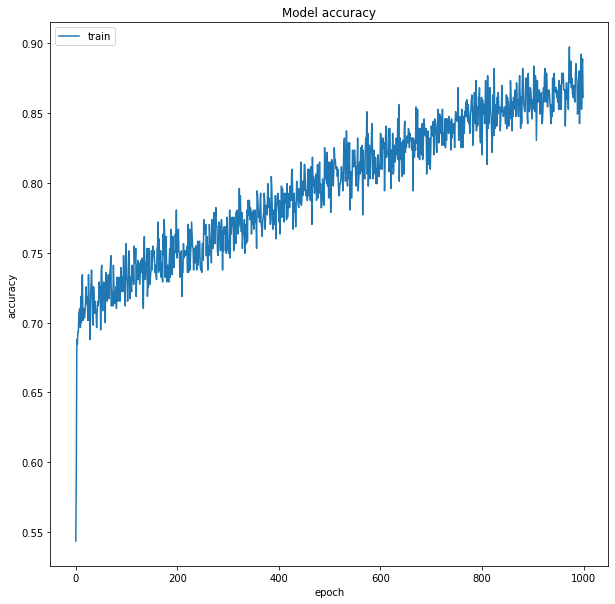

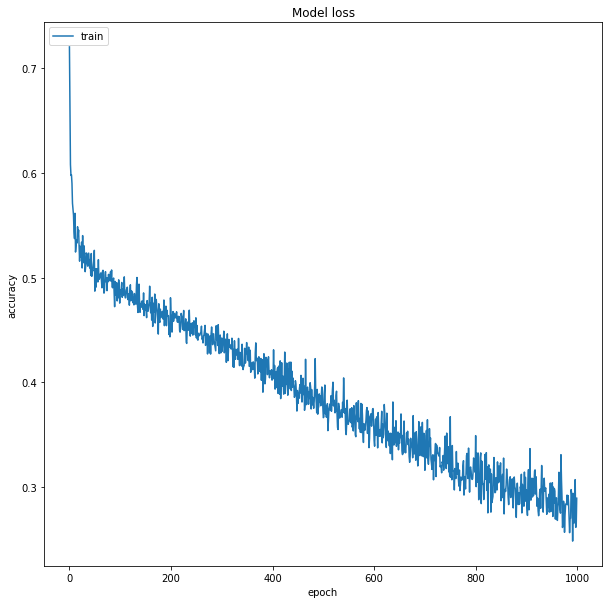

In [33]:
# summarize history for accuracy
plt.figure(figsize=(10,10))
plt.plot(model_trained.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.figure(figsize=(10,10))
plt.plot(model_trained.history['loss'])
plt.title('Model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# Evaluating the model

In [34]:
train_predictions_baseline = model.predict(train_features, batch_size=32)
test_predictions_baseline = model.predict(test_features, batch_size=32)

- Confusion Matrix

Correctly identified negative patients (True Negatives):  75
Incorrectly identified negative patients (False Positives):  15
Incorrectly identified positive patients:(False Negatives):  10
Correctly identified positive patients (True Positives):  211
Total Positive patients:  221
Total Negative Patients:  90


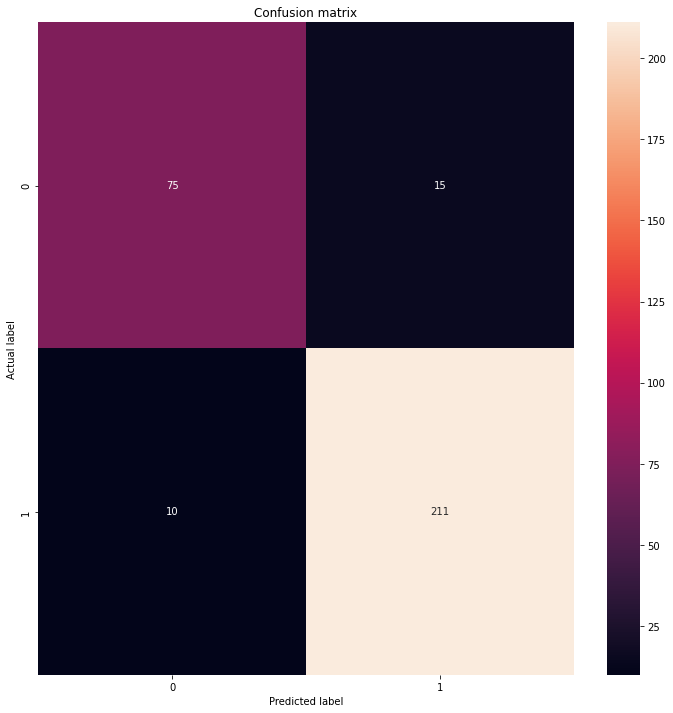

In [35]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_df_labels, test_predictions_baseline >0.5)
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, fmt="d",xticklabels=True, yticklabels=True,)

plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print('Correctly identified negative patients (True Negatives): ', cm[0][0])
print('Incorrectly identified negative patients (False Positives): ', cm[0][1])
print('Incorrectly identified positive patients:(False Negatives): ', cm[1][0])
print('Correctly identified positive patients (True Positives): ', cm[1][1])
print('Total Positive patients: ', np.sum(cm[1]))
print('Total Negative Patients: ', np.sum(cm[0]))